# Tasca M5 T02

### Exercici 1
#### Parteix el conjunt de dades adjunt en train i test i fes tot el procés d'entrenament i prova. Estudia els dos conjunts per separat, a nivell descriptiu.

In [356]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns

# Preprocesado y análisis
# ==============================================================================
#import statsmodels.api as sm
#import pingouin as pg
from scipy import stats
import random as rd
from imblearn.over_sampling import SMOTE

# Preprocesado y modelado
# ==============================================================================
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.tree import export_text
from sklearn.inspection import permutation_importance
import multiprocessing
from sklearn import neighbors, datasets, preprocessing
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures


# Test Estadísticos
# ==============================================================================
from scipy.stats import pearsonr
from statistics import mode
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import anderson
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import kendalltau
from scipy.stats import chi2_contingency
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from scipy.stats import f_oneway
from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon
from scipy.stats import kruskal
from scipy.stats import friedmanchisquare

# Ajuste de distribuciones
# ==============================================================================
from scipy import stats
import inspect
from statsmodels.distributions.empirical_distribution import ECDF


# Configuración matplotlib
# ==============================================================================
plt.style.use('ggplot')
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

#### A) Data Frame

In [357]:
data= pd.read_csv(r"C:\Users\hecto\OneDrive\Documentos\IT Data Science\Sprint5_DS\datos\housing data.csv",header=None)
data_original =data
data_original.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Relevant Information: Concerns housing values in suburbs of Boston.

Number of Instances: 506

Number of Attributes: 13 continuous attributes (including "class" attribute "MEDV"), 1 binary-valued attribute.

Attribute Information:
1. CRIM : per capita crime rate by town
2. ZN : proportion of residential land zoned for lots over "25,000 sq.ft".
3. INDUS : proportion of non-retail business acres per town
4. CHAS : Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX : nitric oxides concentration (parts per 10 million)
6. RM : average number of rooms per dwelling
7. AGE : proportion of owner-occupied units built prior to 1940
8. DIS:  weighted distances to five Boston employment centres
9. RAD . index of accessibility to radial highways

10. TAX : full-value property-tax rate per "$10,000"

11. PTRATIO: pupil-teacher ratio by town

12. B : "1000(Bk - 0.63)^2" where Bk is the proportion of blacks by town

13. LSTAT : % lower status of the population
14. MEDV : Median value of owner-occupied homes in "$1000's"


In [358]:
data.columns =["CRIM","ZN","INDUS","CHAS","NOX","RM ","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT","MEDV"] 

In [359]:
data.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


#### B) Data Describe

In [360]:
df= data.describe().transpose()
df

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


#### C) Media y Desviación Estándar de cada una de las variables

Para comparar la separación en muestras de  train y test vamos a crear una data frame con las medias y desviaciones estándar de cada una de las variables con el objeto de compararlas posteriormente con las dos muestras.

In [361]:
data_medias=df[["mean","std"]]
data_medias

,mean,std
CRIM,3.613524,8.601545
ZN,11.363636,23.322453
INDUS,11.136779,6.860353
CHAS,0.069170,0.253994
NOX,0.554695,0.115878
RM,6.284634,0.702617
AGE,68.574901,28.148861
DIS,3.795043,2.105710
RAD,9.549407,8.707259
TAX,408.237154,168.537116


##### La media de MEDV - que corrsponde a la media del valor de las casas ocupadas y que es nuestra variable objetivo es 22.532 dólares mientras que la desviación estándar es 9.197 dólares.

#### D) Correlación entre las variables del Data Frame

<AxesSubplot:>

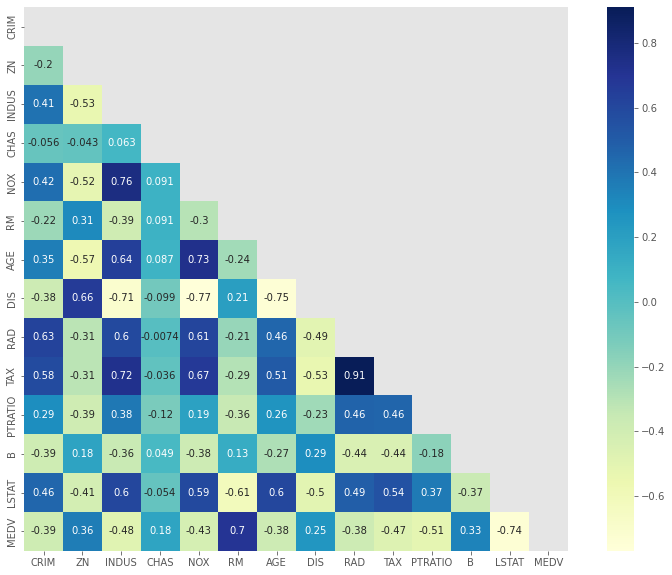

In [362]:
plt.figure(figsize=(14,10))
upp_mat = np.triu(data.corr())
sns.heatmap(data.corr(),cmap="YlGnBu", square = True,annot=True, mask = upp_mat)

##### Entre la variable objetivo MEDV y el resto de variables, la correlación (inversa) más elevada se da con la variable LSTAT que es el porcentaje de población con menos ingresos.En los Los barrios con más trabajadores de clase baja (mayor valor de ‘LSTAT’) los inmuebles valdrán menos.
##### La siguiente variable con mayor correlación es RM  que es el promedio de habitaciones por vivienda. Las casas con más habitaciones (valor más alto de ‘RM’) valdrán más. Por lo general, las casas con más habitaciones son más grandes y pueden acomodar a más personas, por lo que es razonable que cuesten más dinero. Son variables directamente proporcionales.
##### Los vecindarios con más proporción de estudiantes por maestro (mayor valor de ‘PTRATIO’) el valor de las casas está inversamente correlacionado, Si el porcentaje de estudiantes por maestro es mayor, es probable que en el vecindario haya menos escuelas, o mayor densidad de población, por lo que influye negativamente en el valor de los inmuebles.

#### E) División de los datos en X_train - X_test, y_train -y_test

In [363]:
# División de los datos en train y test
# ==============================================================================
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns = "MEDV"),data['MEDV'], test_size=0.33, random_state = 1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(339, 13) (167, 13) (339,) (167,)


In [364]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 339 entries, 378 to 37
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     339 non-null    float64
 1   ZN       339 non-null    float64
 2   INDUS    339 non-null    float64
 3   CHAS     339 non-null    int64  
 4   NOX      339 non-null    float64
 5   RM       339 non-null    float64
 6   AGE      339 non-null    float64
 7   DIS      339 non-null    float64
 8   RAD      339 non-null    int64  
 9   TAX      339 non-null    float64
 10  PTRATIO  339 non-null    float64
 11  B        339 non-null    float64
 12  LSTAT    339 non-null    float64
dtypes: float64(11), int64(2)
memory usage: 37.1 KB


In [365]:
X_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CRIM,339.0,3.793986,8.669966,0.00632,0.08577,0.25387,3.81234,73.5341
ZN,339.0,10.963127,23.058729,0.00000,0.00000,0.00000,12.50000,100.0000
INDUS,339.0,11.377493,6.874160,0.46000,5.64000,9.90000,18.10000,27.7400
CHAS,339.0,0.079646,0.271145,0.00000,0.00000,0.00000,0.00000,1.0000
NOX,339.0,0.556238,0.117996,0.39200,0.44800,0.53800,0.62750,0.8710
RM,339.0,6.247490,0.669953,3.86300,5.87300,6.16700,6.58250,8.3980
AGE,339.0,69.173451,28.246657,6.00000,45.75000,79.70000,94.30000,100.0000
DIS,339.0,3.799550,2.114897,1.12960,2.09445,3.26280,5.03375,12.1265
RAD,339.0,9.622419,8.768838,1.00000,4.00000,5.00000,24.00000,24.0000
TAX,339.0,408.890855,169.654094,187.00000,279.00000,330.00000,666.00000,711.0000


In [366]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167 entries, 307 to 347
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     167 non-null    float64
 1   ZN       167 non-null    float64
 2   INDUS    167 non-null    float64
 3   CHAS     167 non-null    int64  
 4   NOX      167 non-null    float64
 5   RM       167 non-null    float64
 6   AGE      167 non-null    float64
 7   DIS      167 non-null    float64
 8   RAD      167 non-null    int64  
 9   TAX      167 non-null    float64
 10  PTRATIO  167 non-null    float64
 11  B        167 non-null    float64
 12  LSTAT    167 non-null    float64
dtypes: float64(11), int64(2)
memory usage: 18.3 KB


In [367]:
X_test.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CRIM,167.0,3.247195,8.474939,0.01096,0.076945,0.26169,3.122525,88.9762
ZN,167.0,12.176647,23.898258,0.00000,0.000000,0.00000,20.000000,95.0000
INDUS,167.0,10.648144,6.826662,1.25000,4.675000,8.56000,18.100000,27.7400
CHAS,167.0,0.047904,0.214206,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,167.0,0.551563,0.111736,0.38500,0.458000,0.53200,0.624000,0.8710
RM,167.0,6.360036,0.761180,3.56100,5.979500,6.31000,6.630500,8.7800
AGE,167.0,67.359880,27.994376,2.90000,41.700000,73.30000,93.150000,100.0000
DIS,167.0,3.785894,2.093240,1.17810,2.101800,3.09230,5.307650,10.7103
RAD,167.0,9.401198,8.605168,1.00000,4.000000,5.00000,16.000000,24.0000
TAX,167.0,406.910180,166.745525,188.00000,281.000000,337.00000,666.000000,711.0000


#### f) Sumario de datos comparados de medias y desviaciones estándar entre: datos originales - train - test.

#### f.1) Diferencias entre medias: data - X_train

In [368]:
# Data Summary
# Creacción de un diccionario con los resultados de las medias de los datos y train
outcomes1 = {'data_mean':data_medias["mean"],'train_mean':X_train.mean()}

# Transformación del diccionario en un data frame
outcomes1 = pd.DataFrame(outcomes1, index=["CRIM","ZN","INDUS","CHAS","NOX","RM ","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"])

# Se añade el valor correspondiente al error %
outcomes1['%_error1'] = (abs(outcomes1['data_mean'] - outcomes1['train_mean']))/outcomes1['data_mean'] *100

# Salida de información en función del menor valor del error %.
#outcomes1.sort_values(by='%_error1')
outcomes1

,data_mean,train_mean,%_error1
CRIM,3.613524,3.793986,4.994092
ZN,11.363636,10.963127,3.524484
INDUS,11.136779,11.377493,2.161433
CHAS,0.069170,0.079646,15.145386
NOX,0.554695,0.556238,0.278117
RM,6.284634,6.247490,0.591040
AGE,68.574901,69.173451,0.872841
DIS,3.795043,3.799550,0.118757
RAD,9.549407,9.622419,0.764569
TAX,408.237154,408.890855,0.160128


#### f.2) Diferencias entre Desviación Estándar: data - X_train

In [369]:
# Data Summary
# Creacción de un diccionario con los resultados de las medias de los datos y train
outcomes2 = {'data_std':data_medias["std"],'train_std':X_train.std()}

# Transformación del diccionario en un data frame
outcomes2 = pd.DataFrame(outcomes2, index=["CRIM","ZN","INDUS","CHAS","NOX","RM ","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"])

# Se añade el valor correspondiente al error %
outcomes2['%_error2'] = round((abs(outcomes2['data_std'] - outcomes2['train_std']))/outcomes2['data_std'] *100,4)

# Salida de información en función del menor valor del error %.
#outcomes2.sort_values(by='%_error2')
outcomes2

,data_std,train_std,%_error2
CRIM,8.601545,8.669966,0.7954
ZN,23.322453,23.058729,1.1308
INDUS,6.860353,6.874160,0.2013
CHAS,0.253994,0.271145,6.7524
NOX,0.115878,0.117996,1.8285
RM,0.702617,0.669953,4.6489
AGE,28.148861,28.246657,0.3474
DIS,2.105710,2.114897,0.4363
RAD,8.707259,8.768838,0.7072
TAX,168.537116,169.654094,0.6627


#### f.3) Diferencias entre Medias: Data - X_test

In [370]:
# Data Summary
# Creacción de un diccionario con los resultados de las medias de los datos y train
outcomes3 = {'data_mean':data_medias["mean"],'test_mean':X_test.mean()}

# Transformación del diccionario en un data frame
outcomes3 = pd.DataFrame(outcomes3, index=["CRIM","ZN","INDUS","CHAS","NOX","RM ","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"])

# Se añade el valor correspondiente al error %
outcomes3['%_error3'] = round((abs(outcomes3['data_mean'] - outcomes3['test_mean']))/outcomes3['data_mean'] *100,4)

# Salida de información en función del menor valor del error %.
#outcomes3.sort_values(by='%_error3')
outcomes3

,data_mean,test_mean,%_error3
CRIM,3.613524,3.247195,10.1377
ZN,11.363636,12.176647,7.1545
INDUS,11.136779,10.648144,4.3876
CHAS,0.069170,0.047904,30.7442
NOX,0.554695,0.551563,0.5646
RM,6.284634,6.360036,1.1998
AGE,68.574901,67.359880,1.7718
DIS,3.795043,3.785894,0.2411
RAD,9.549407,9.401198,1.5520
TAX,408.237154,406.910180,0.3250


#### f.4) Diferencias entre Desviación Estándar: Data - X_test

In [371]:
# Data Summary
# Creacción de un diccionario con los resultados de las medias de los datos y train
outcomes4 = {'data_std':data_medias["std"],'test_std':X_test.std()}

# Transformación del diccionario en un data frame
outcomes4 = pd.DataFrame(outcomes4, index=["CRIM","ZN","INDUS","CHAS","NOX","RM ","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"])

# Se añade el valor correspondiente al error %
outcomes4['%_error4'] = round((abs(outcomes4['data_std'] - outcomes4['test_std']))/outcomes4['data_std'] *100,4)

# Salida de información en función del menor valor del error %.
#outcomes4.sort_values(by='%_error4')
outcomes4

,data_std,test_std,%_error4
CRIM,8.601545,8.474939,1.4719
ZN,23.322453,23.898258,2.4689
INDUS,6.860353,6.826662,0.4911
CHAS,0.253994,0.214206,15.6650
NOX,0.115878,0.111736,3.5746
RM,0.702617,0.761180,8.3350
AGE,28.148861,27.994376,0.5488
DIS,2.105710,2.093240,0.5922
RAD,8.707259,8.605168,1.1725
TAX,168.537116,166.745525,1.0630


#### f.5) Diferecias entre Medias: X_train - X_test

In [372]:
# Data Summary
# Creacción de un diccionario con los resultados de las medias de los datos y train
outcomes5 = {'train_mean':X_train.mean(),'test_mean':X_test.mean()}

# Transformación del diccionario en un data frame
outcomes5 = pd.DataFrame(outcomes5, index=["CRIM","ZN","INDUS","CHAS","NOX","RM ","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"])

# Se añade el valor correspondiente al error %
outcomes5['%_error5'] =round( (abs(outcomes5['train_mean'] - outcomes5['test_mean']))/outcomes5['train_mean'] *100,4)

# Salida de información en función del menor valor del error %.
#outcomes5.sort_values(by='%_error5')
outcomes5

,train_mean,test_mean,%_error5
CRIM,3.793986,3.247195,14.4120
ZN,10.963127,12.176647,11.0691
INDUS,11.377493,10.648144,6.4105
CHAS,0.079646,0.047904,39.8536
NOX,0.556238,0.551563,0.8403
RM,6.247490,6.360036,1.8015
AGE,69.173451,67.359880,2.6218
DIS,3.799550,3.785894,0.3594
RAD,9.622419,9.401198,2.2990
TAX,408.890855,406.910180,0.4844


#### f.6) Diferencias entre Desviación Estándar: X_train - X_test

In [373]:
# Data Summary
# Creacción de un diccionario con los resultados de las medias de los datos y train
outcomes6 = {'train_std':X_train.std(),'test_std':X_test.std()}

# Transformación del diccionario en un data frame
outcomes6 = pd.DataFrame(outcomes6, index=["CRIM","ZN","INDUS","CHAS","NOX","RM ","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"])

# Se añade el valor correspondiente al error %
outcomes6['%_error6'] =round( (abs(outcomes6['train_std'] - outcomes6['test_std']))/outcomes6['train_std'] *100,4)

# Salida de información en función del menor valor del error %.
#outcomes6.sort_values(by='%_error6')
outcomes6

,train_std,test_std,%_error6
CRIM,8.669966,8.474939,2.2495
ZN,23.058729,23.898258,3.6408
INDUS,6.874160,6.826662,0.6910
CHAS,0.271145,0.214206,20.9994
NOX,0.117996,0.111736,5.3060
RM,0.669953,0.761180,13.6169
AGE,28.246657,27.994376,0.8931
DIS,2.114897,2.093240,1.0240
RAD,8.768838,8.605168,1.8665
TAX,169.654094,166.745525,1.7144


#### g) Gráfico de diferencias de errores en la media y desviación estándar entre: Data - X_train - X_test

In [374]:
dif_medias=pd.concat([outcomes1['%_error1'], outcomes3['%_error3'], outcomes5['%_error5']], axis=1)
dif_medias=dif_medias.rename({'%_error1': 'Data - X_train', '%_error3': 'Data - X_test', '%_error5': 'X_train - X_test'}, axis=1)

In [375]:
dif_dEst=pd.concat([outcomes2['%_error2'], outcomes4['%_error4'], outcomes6['%_error6']], axis=1)
dif_dEst=dif_dEst.rename({'%_error2': 'Data - X_train', '%_error4': 'Data - X_test', '%_error6': 'X_train - X_test'}, axis=1)

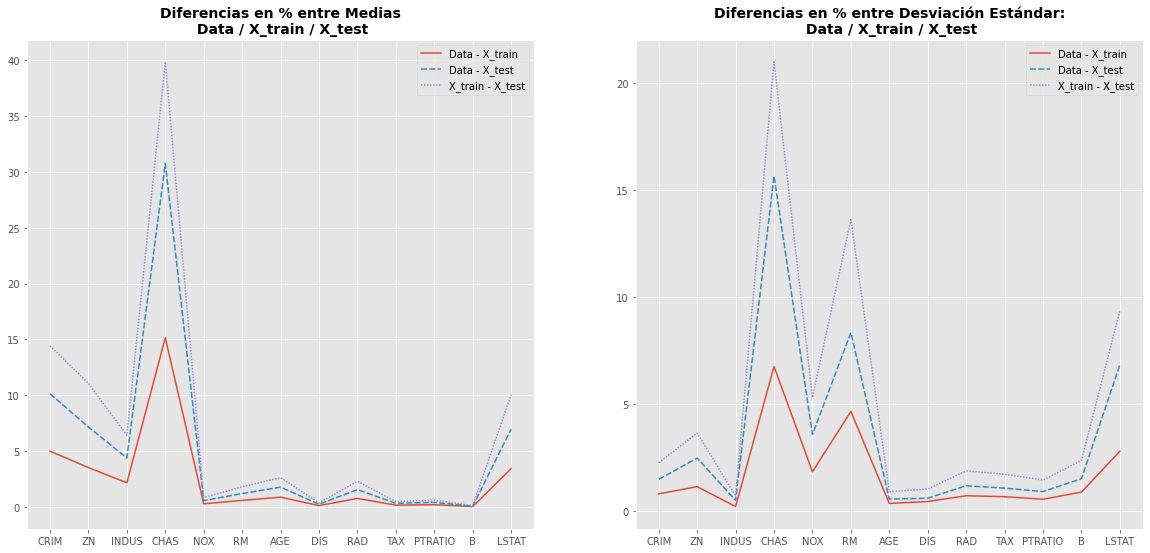

In [376]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(20, 9))
axes = axes.flat
axes[0].set_title("Diferencias en % entre Medias\n Data / X_train / X_test", fontsize = 14, fontweight = "bold")
sns.lineplot(data=dif_medias,ax=axes[0])
axes[1].set_title("Diferencias en % entre Desviación Estándar:\n Data / X_train / X_test", fontsize = 14, fontweight = "bold")
sns.lineplot(data=dif_dEst,ax=axes[1])
plt.savefig("Gafico1_Diferencias_medias_std.png")

##### Las mayores diferencias en % se producen entre la comparaciço de las medias y desviaciones estándar de X_train con X_test (línea gris)
##### La variable CHAS -Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)- es la que genera mayores difrerencias de media y desviación estándar entre los tres grupos de datos, y es debido a que los datos informados son binarios 0 y 1, lo que puede producir mayores sesgos en las muestras.

#### h) Diferencias de medias y desviación estándar entre: Data - y_train - y_test

In [377]:
medias_y= [data.MEDV.mean(), y_train.mean(), y_test.mean()]
print("\nMedia de MEDV del Data Frame:", round(medias_y[0],2),"\nMedia de MEDV y_train: ", round(medias_y[1],2),"\nMedia de MEDV y_test: ", round(medias_y[2],2))
dEst_y = [data.MEDV.std(),y_train.std(),y_test.std()]
print("\nDesviación Estándar de MEDV del Data Frame:", round(dEst_y[0],2), "\nstd de MEDV y_train: ", round(dEst_y[1],2),"\nstd de MEDV y_test: ",round(dEst_y[2],2))


Media de MEDV del Data Frame: 22.53 
Media de MEDV y_train:  22.29 
Media de MEDV y_test:  23.03

Desviación Estándar de MEDV del Data Frame: 9.2 
std de MEDV y_train:  9.09 
std de MEDV y_test:  9.41


In [378]:
err_data_Xtrain= abs((medias_y[0]-medias_y[1])*100/medias_y[0])
err_data_Xtest=abs((medias_y[0]-medias_y[2])*100/medias_y[0])
err_Xtrain_Xtest=abs((medias_y[1]-medias_y[2])*100/medias_y[1])
print("% error de las medias de MEDV", "\nData - X_train: ", round(err_data_Xtrain,2), "\nData - X_test",round(err_data_Xtest,2),"\nX_train - X_test",round(err_Xtrain_Xtest,2))

% error de las medias de MEDV 
Data - X_train:  1.08 
Data - X_test 2.19 
X_train - X_test 3.3


##### La mayor diferencia % de las medias de MEDV se produce entre la comparación de los valores de y_train e y_test

In [379]:
err2_data_Xtrain= abs((dEst_y[0]-dEst_y[1])*100/dEst_y[0])
err2_data_Xtest=abs((dEst_y[0]-dEst_y[2])*100/dEst_y[0])
err2_Xtrain_Xtest=abs((dEst_y[1]-dEst_y[2])*100/dEst_y[1])
print("% error de las desviaciones estándar de MEDV", "\nData - X_train: ", round(err2_data_Xtrain,2), "\nData - X_test: ",round(err2_data_Xtest,2), "\nX_train - X_test: ",round(err2_Xtrain_Xtest,2))

% error de las desviaciones estándar de MEDV 
Data - X_train:  1.13 
Data - X_test:  2.34 
X_train - X_test:  3.5


##### De la misma forma, la mayor diferencia en % en las desviaciones estándar se produce entre la muestra y_train e y_test

#### i) Ajuste del modelo 1:

La clase DecisionTreeRegressor del módulo sklearn.tree permite entrenar árboles de decisión para problemas de regresión. Se ha ajustado un árbol de regresión empleando como variable respuesta MEDV y como predictores el resto de variables disponibles.

In [380]:
# Creación del modelo
# ------------------------------------------------------------------------------
modelo = DecisionTreeRegressor(max_depth= 3,random_state = 1)

# Entrenamiento del modelo
# ------------------------------------------------------------------------------
modelo.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=1)

Profundidad del árbol: 3
Número de nodos terminales: 8


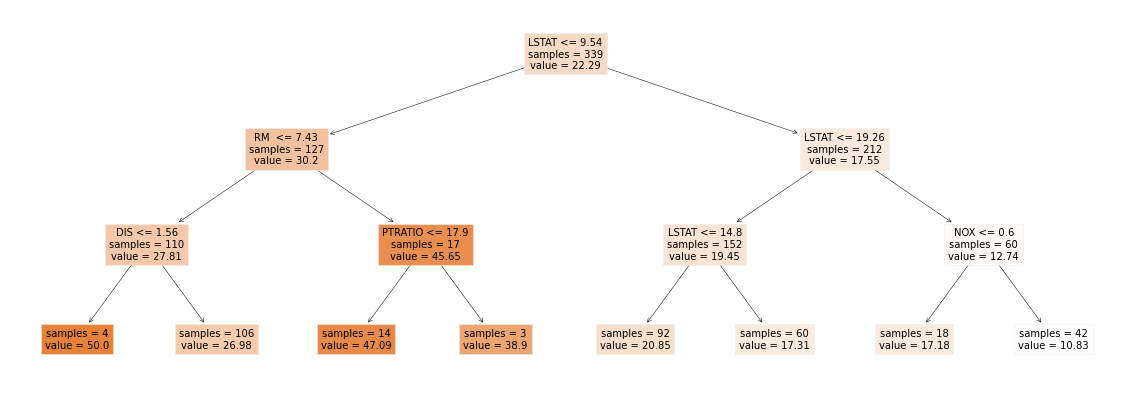

In [381]:
# Estructura del árbol creado
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(20, 7))

print(f"Profundidad del árbol: {modelo.get_depth()}")
print(f"Número de nodos terminales: {modelo.get_n_leaves()}")

plot = plot_tree(
            decision_tree = modelo,
            feature_names = data.drop(columns = "MEDV").columns,
            class_names   = 'MEDV',
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )

In [382]:
texto_modelo = export_text(
                    decision_tree = modelo,
                    feature_names = list(data.drop(columns = "MEDV").columns)
               )
print(texto_modelo)

|--- LSTAT <= 9.54
|   |--- RM  <= 7.43
|   |   |--- DIS <= 1.56
|   |   |   |--- value: [50.00]
|   |   |--- DIS >  1.56
|   |   |   |--- value: [26.98]
|   |--- RM  >  7.43
|   |   |--- PTRATIO <= 17.90
|   |   |   |--- value: [47.09]
|   |   |--- PTRATIO >  17.90
|   |   |   |--- value: [38.90]
|--- LSTAT >  9.54
|   |--- LSTAT <= 19.26
|   |   |--- LSTAT <= 14.80
|   |   |   |--- value: [20.85]
|   |   |--- LSTAT >  14.80
|   |   |   |--- value: [17.31]
|   |--- LSTAT >  19.26
|   |   |--- NOX <= 0.60
|   |   |   |--- value: [17.18]
|   |   |--- NOX >  0.60
|   |   |   |--- value: [10.83]



In [383]:
# Error de test del modelo
#-------------------------------------------------------------------------------
y_predicciones = modelo.predict(X = X_test)

rmse = mean_squared_error(y_true  = y_test, y_pred  = y_predicciones, squared = False)
print(f"El error (rmse) de test es: {rmse}")

El error (rmse) de test es: 4.344171773527096


##### El modelo predice un valor promedio de MEDV de 50.000 dólares para viviendas que están en una zona con un LSTAT <=9.54, un RM<= 7.43  y un DIS <= 1.56.
##### El rmse de test implica que las predicciones del modelo se alejan en promedio 4.344 dólares del valor real

#### j) Ajuste Modelo 2:

Se ajusta un modelo empleando como variable respuesta MEDV y como predictores todas las otras variables disponibles. La clase RandomForestRegressor del módulo sklearn.ensemble permite entrenar modelos random forest para problemas de regresión

In [384]:
# Creación del modelo
# ==============================================================================
modelo = RandomForestRegressor(random_state=1)

# Entrenamiento del modelo
# ==============================================================================
modelo.fit(X_train, y_train)

# Predicciones
# ==============================================================================
y_predicciones = modelo.predict(X_test)

# Evaluación de las predicciones
# ==============================================================================
mae = mean_absolute_error(y_test, y_predicciones)
print(f'El error MAE es: %.3f' % mae)
rmse = mean_squared_error(y_true= y_test, y_pred= y_predicciones,squared = False)
print(f'El error (rmse) de test es: %.3f'% rmse)

El error MAE es: 2.171
El error (rmse) de test es: 3.051


##### El "rmse" de test del segundo modelo, implica que las predicciones del modelo se alejan en promedio 3.051 dólares del valor real.
##### Al ser un valor inferior que el del primer modelo, utilizaremos éste para contrastar los resultados con los datos normalizados y aplicando dummy en las variables categóricas para evaluar si las prediciones mejoran con dichos ajustes.

### Exercici 2
#### Aplica algun procés de transformació (estandarditzar les dades numèriques, crear columnes dummies, polinomis...).

#### a) Data Frame

In [385]:
data.select_dtypes(include=['float64', 'int']).describe().round(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000
mean,3.614,11.364,11.137,0.069,0.555,6.285,68.575,3.795,9.549,408.237,18.456,356.674,12.653,22.533
std,8.602,23.322,6.860,0.254,0.116,0.703,28.149,2.106,8.707,168.537,2.165,91.295,7.141,9.197
min,0.006,0.000,0.460,0.000,0.385,3.561,2.900,1.130,1.000,187.000,12.600,0.320,1.730,5.000
25%,0.082,0.000,5.190,0.000,0.449,5.885,45.025,2.100,4.000,279.000,17.400,375.378,6.950,17.025
50%,0.257,0.000,9.690,0.000,0.538,6.208,77.500,3.207,5.000,330.000,19.050,391.440,11.360,21.200
75%,3.677,12.500,18.100,0.000,0.624,6.624,94.075,5.188,24.000,666.000,20.200,396.225,16.955,25.000
max,88.976,100.000,27.740,1.000,0.871,8.780,100.000,12.126,24.000,711.000,22.000,396.900,37.970,50.000


#### b) Distribución gráfica de cada variable numérica

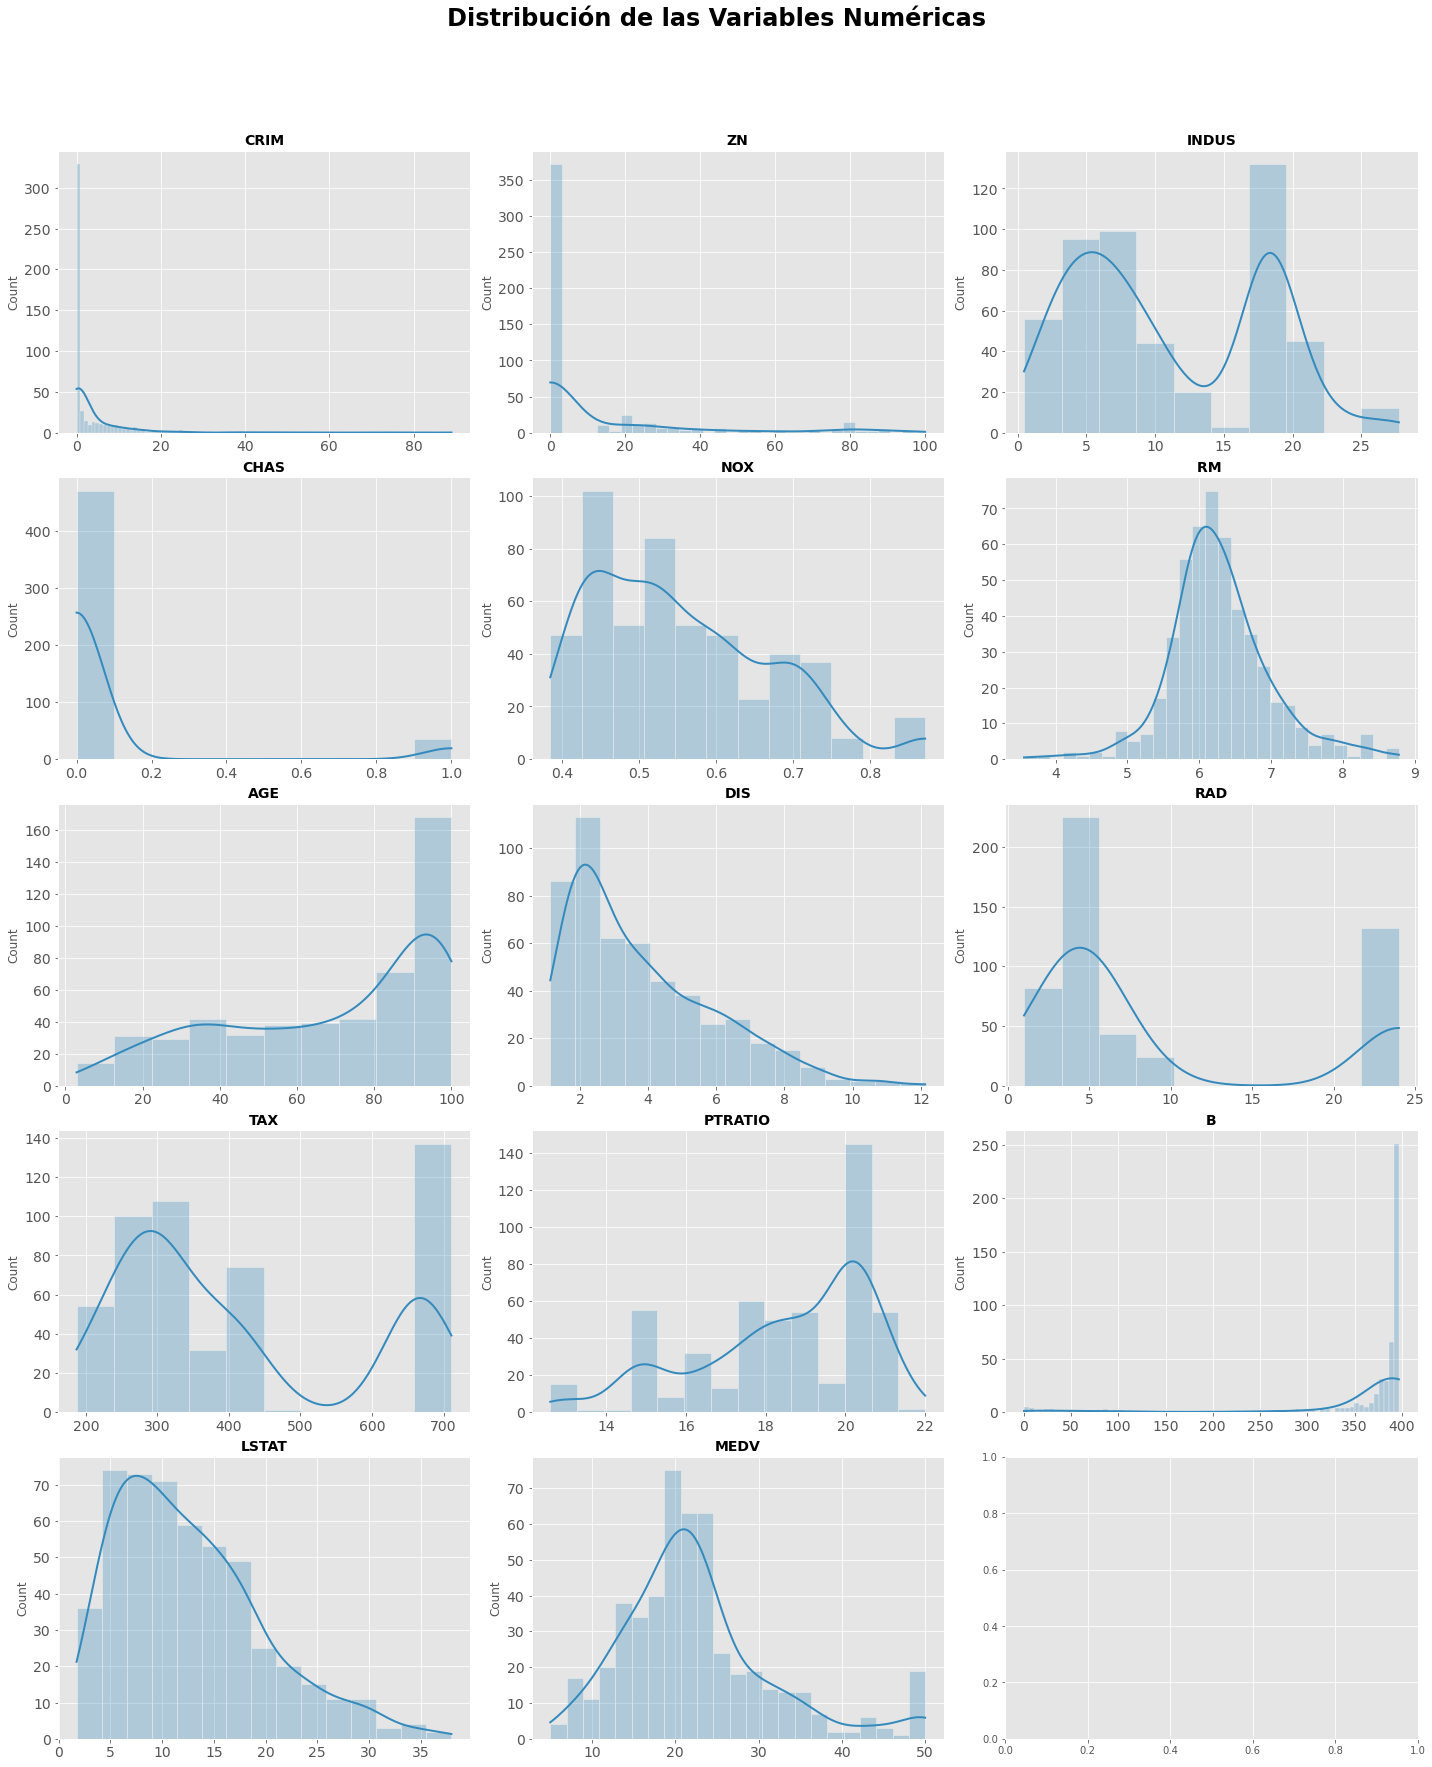

In [386]:
# Distribución gráfica de cada variable numérica
# ==============================================================================

fig, axes = plt.subplots(ncols=3, nrows=5, figsize=(20, 25))
axes = axes.flat
columnas_numeric = data.select_dtypes(include=['float64', 'int']).columns

for i, colum in enumerate(columnas_numeric):
    sns.histplot(data = data, x= colum, stat= "count", kde = True,line_kws= {'linewidth': 2}, alpha   = 0.3, ax = axes[i])
    axes[i].set_title(colum, fontsize = 14, fontweight = "bold")
    axes[i].tick_params(labelsize = 14)
    axes[i].set_xlabel("")
       
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución de las Variables Numéricas', fontsize = 24, fontweight = "bold")
plt.savefig("Gafico2_Dist_Variables_Numericas.png")

##### RM sigue claramente una distribución normal así como MEDV la variable objetivo. 
##### Las variables INDUS, RAS Y TAX siguen una distribución que se aproximan más a una distribución polinómica.
##### LSTAT, AGE, DIS, PTRATIO y NOX se aproximan más a una distribución Gaussiana con sesgo
##### El resto de variables CRIM, ZN, CHAS podrían ajustarse a exponenciales decrecientes o crecientes en el caso de B.

#### c) Gráficos de correlación entre las variables numéricas y la variable objetivo

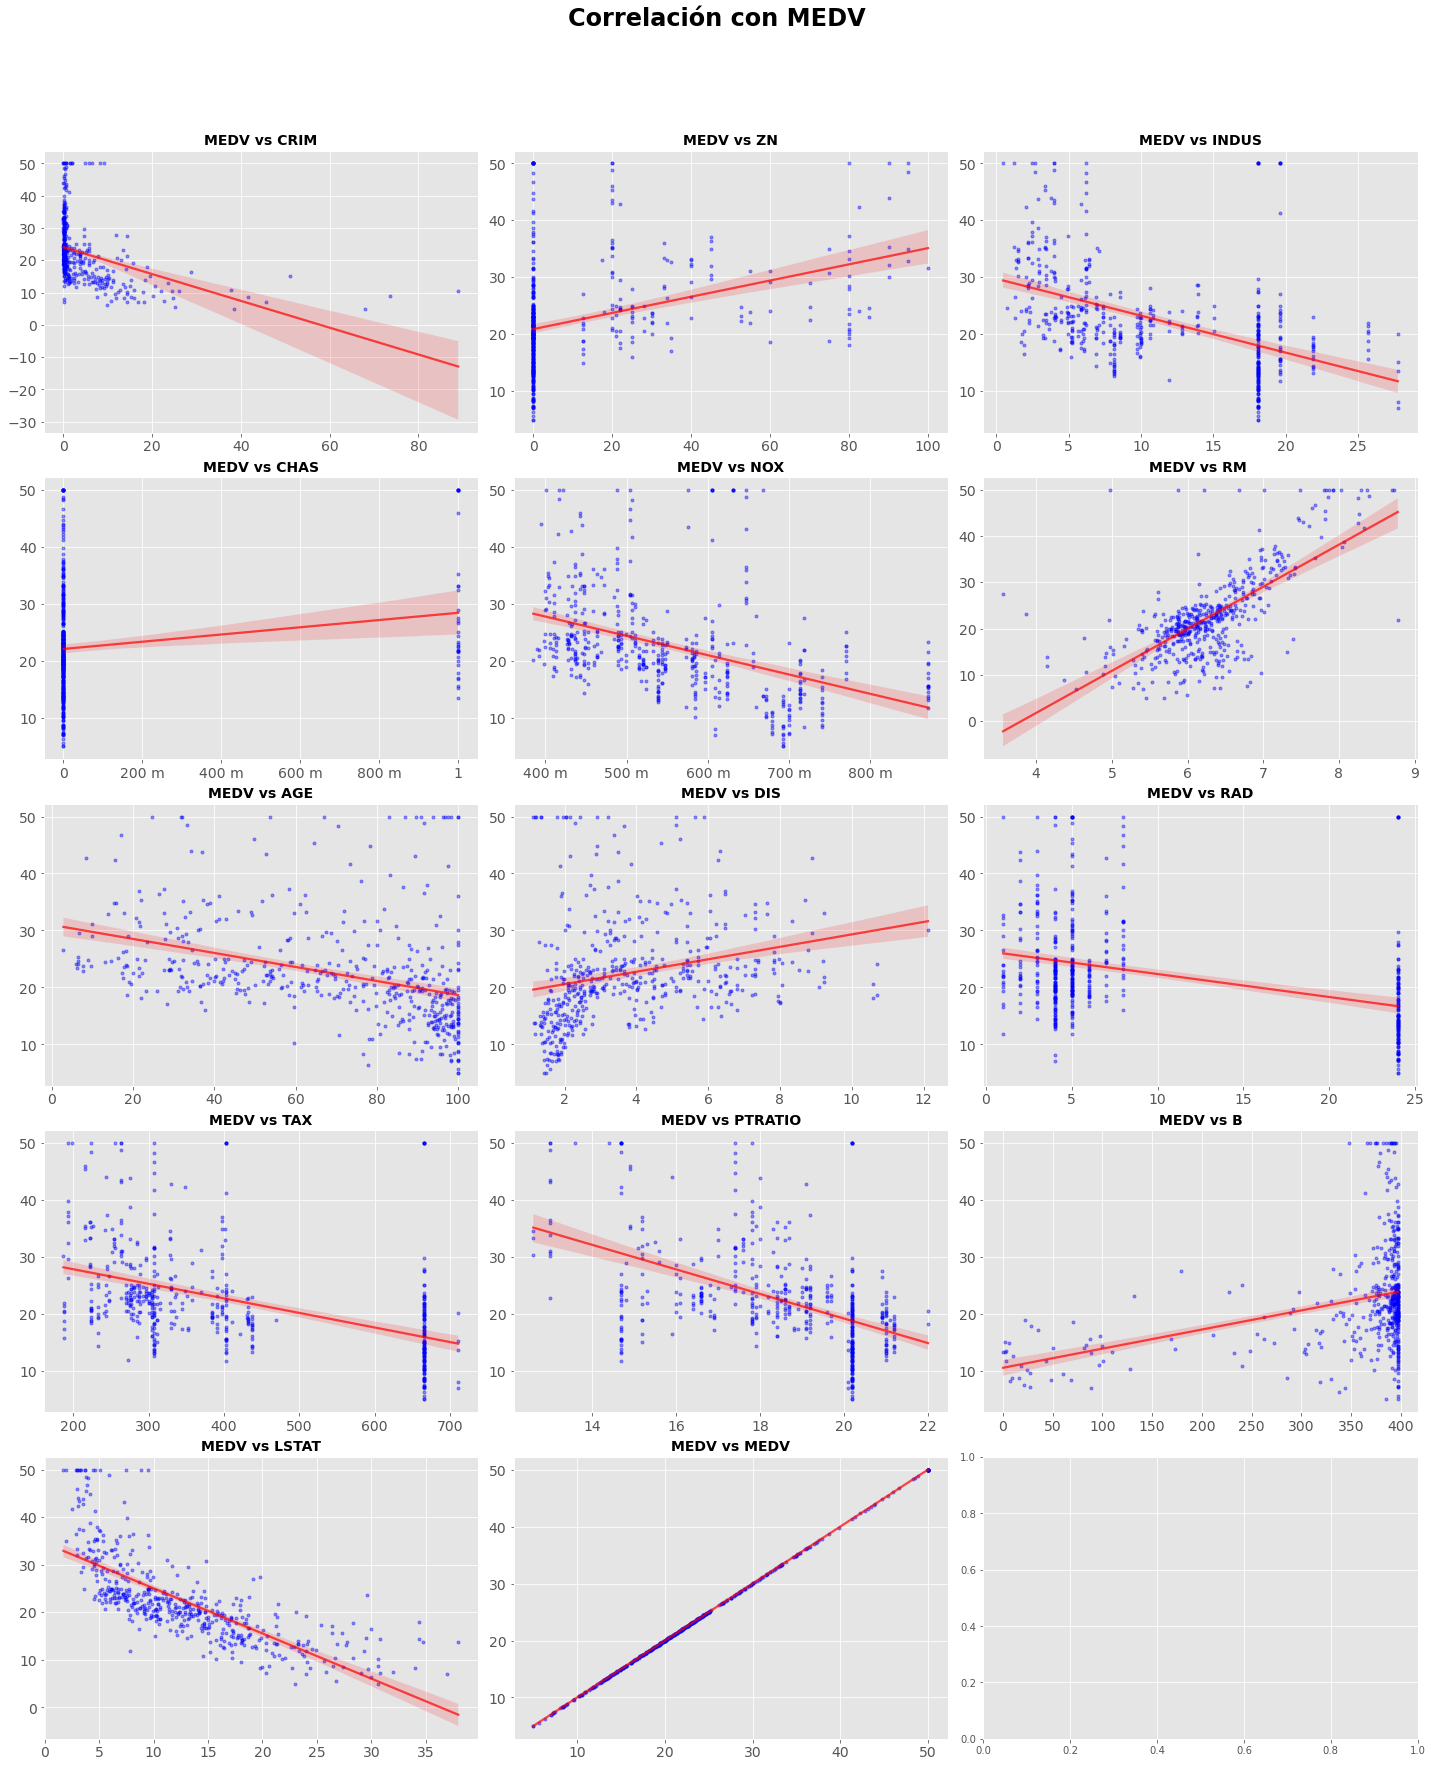

In [387]:
# Gráficos de correlación entre las variables numéricas y la variable objetivo
# ==============================================================================
# Adjust number of subplots based on the number of columns
fig, axes = plt.subplots(ncols=3, nrows=5,  figsize=(20, 25))
axes = axes.flat
columnas_numeric = data.select_dtypes(include=['float64', 'int']).columns
i=0
for i, colum in enumerate(columnas_numeric):
    sns.regplot( x = data[colum],y = data['MEDV'], color = "blue", marker= '.', scatter_kws = {"alpha":0.4},line_kws = {"color":"r","alpha":0.7}, ax= axes[i])   
    axes[i].set_title(f"MEDV vs {colum}", fontsize = 14, fontweight = "bold")
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].xaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 14)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
   
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Correlación con MEDV', fontsize = 24, fontweight = "bold")
plt.savefig("Grafico3_Distribucion_Corr_MEDV.png")

##### LSTAT y RM son las variables que tiene una correlación más evidente con la variable objetivo MEDV.
##### Vamos a ajustar todos las variables a la distribución normal ya que LSTAT y RM son las que tienen una correlación mas clara con MEDV y como se indicaba en el apartado anterior la distribución de probabilidad de ambas se ajustan a la normal.
##### Las variables chas y rad se distribuyen de forma vertical, esto se debe a que son datos categóricos.
##### CHAS indica si las casas están cerca del río Charles; 1 si el tramo limita con el río, 0 en caso contrario.
##### RAD contiene los índices de accesibilidad a las carreteras radiales. Un índice más grande denota una mejor accesibilidad.

#### d) Creación de Columnas Dummies

Dado que la variable CHAS solo tiene dos valores, 1,0, no tiene sentido separar en Dummies esa información, ya que la propia columna la contiene. Sin embargo, si vamo a crear columnas Dummies de RAD, para ver si esta separación de la información, añade más precisión al modelo.

In [388]:
# creamos dummy RAD
df=data
df=pd.get_dummies(df, columns=["RAD"],drop_first = False)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,...,MEDV,RAD_1,RAD_2,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8,RAD_24
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,296.0,15.3,...,24.0,1,0,0,0,0,0,0,0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,242.0,17.8,...,21.6,0,1,0,0,0,0,0,0,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,242.0,17.8,...,34.7,0,1,0,0,0,0,0,0,0
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,222.0,18.7,...,33.4,0,0,1,0,0,0,0,0,0
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,222.0,18.7,...,36.2,0,0,1,0,0,0,0,0,0


#### e) Mapa de correlaciones con las columnas dummies

<AxesSubplot:>

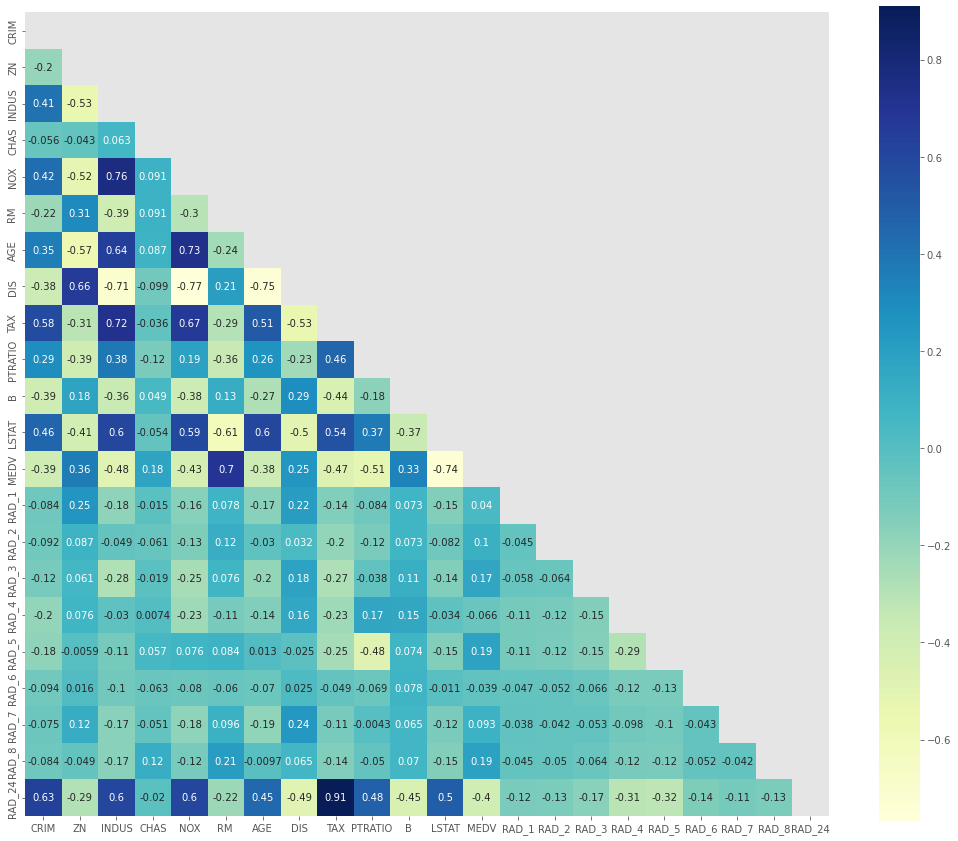

In [389]:
plt.figure(figsize=(18,15))
upp_mat = np.triu(df.corr())
sns.heatmap(df.corr(),cmap="YlGnBu", square = True,annot=True, mask = upp_mat)

##### Una vez aplicados los dummies sobre la variable RAD, los rangos de correlación de cada una de las variables RAD_* generadas vs MEDV, oscilan entre [-0,4 y 0.19] mientras que la correlación inical era de -0.38. 

#### f) División de los datos en train y test

In [390]:
# División de los datos en train y test
# ==============================================================================
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = "MEDV"),df['MEDV'], test_size=0.33, random_state = 1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(339, 21) (167, 21) (339,) (167,)


In [391]:
X_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CRIM,339.0,3.793986,8.669966,0.00632,0.08577,0.25387,3.81234,73.5341
ZN,339.0,10.963127,23.058729,0.00000,0.00000,0.00000,12.50000,100.0000
INDUS,339.0,11.377493,6.874160,0.46000,5.64000,9.90000,18.10000,27.7400
CHAS,339.0,0.079646,0.271145,0.00000,0.00000,0.00000,0.00000,1.0000
NOX,339.0,0.556238,0.117996,0.39200,0.44800,0.53800,0.62750,0.8710
RM,339.0,6.247490,0.669953,3.86300,5.87300,6.16700,6.58250,8.3980
AGE,339.0,69.173451,28.246657,6.00000,45.75000,79.70000,94.30000,100.0000
DIS,339.0,3.799550,2.114897,1.12960,2.09445,3.26280,5.03375,12.1265
TAX,339.0,408.890855,169.654094,187.00000,279.00000,330.00000,666.00000,711.0000
PTRATIO,339.0,18.418584,2.176714,12.60000,17.00000,19.00000,20.20000,22.0000


In [392]:
X_test.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CRIM,167.0,3.247195,8.474939,0.01096,0.076945,0.26169,3.122525,88.9762
ZN,167.0,12.176647,23.898258,0.00000,0.000000,0.00000,20.000000,95.0000
INDUS,167.0,10.648144,6.826662,1.25000,4.675000,8.56000,18.100000,27.7400
CHAS,167.0,0.047904,0.214206,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,167.0,0.551563,0.111736,0.38500,0.458000,0.53200,0.624000,0.8710
RM,167.0,6.360036,0.761180,3.56100,5.979500,6.31000,6.630500,8.7800
AGE,167.0,67.359880,27.994376,2.90000,41.700000,73.30000,93.150000,100.0000
DIS,167.0,3.785894,2.093240,1.17810,2.101800,3.09230,5.307650,10.7103
TAX,167.0,406.910180,166.745525,188.00000,281.000000,337.00000,666.000000,711.0000
PTRATIO,167.0,18.530539,2.145399,13.00000,17.400000,19.10000,20.200000,22.0000


#### f.1) Diferecias entre Medias: X_train - X_test

In [393]:
# Data Summary
# Creacción de un diccionario con los resultados de las medias de los datos y train
outcomes5 = {'train_mean':X_train.mean(),'test_mean':X_test.mean()}

# Transformación del diccionario en un data frame
outcomes5 = pd.DataFrame(outcomes5, index=["CRIM","ZN","INDUS","CHAS","NOX","RM ","AGE","DIS","TAX","PTRATIO","B","LSTAT","RAD_1","RAD_2","RAD_3","RAD_4","RAD_5","RAD_6","RAD_7","RAD_8","RAD_24"])

# Se añade el valor correspondiente al error %
outcomes5['%_error5'] =round( (abs(outcomes5['train_mean'] - outcomes5['test_mean']))/outcomes5['train_mean'] *100,4)

# Salida de información en función del menor valor del error %.
#outcomes5.sort_values(by='%_error5')
outcomes5

,train_mean,test_mean,%_error5
CRIM,3.793986,3.247195,14.4120
ZN,10.963127,12.176647,11.0691
INDUS,11.377493,10.648144,6.4105
CHAS,0.079646,0.047904,39.8536
NOX,0.556238,0.551563,0.8403
RM,6.247490,6.360036,1.8015
AGE,69.173451,67.359880,2.6218
DIS,3.799550,3.785894,0.3594
TAX,408.890855,406.910180,0.4844
PTRATIO,18.418584,18.530539,0.6078


#### f.2) Diferecias entre Desviaciones Estándar: X_train - X_test

In [394]:
# Data Summary
# Creacción de un diccionario con los resultados de las medias de los datos y train
outcomes6 = {'train_std':X_train.std(),'test_std':X_test.std()}

# Transformación del diccionario en un data frame
outcomes6 = pd.DataFrame(outcomes6, index=["CRIM","ZN","INDUS","CHAS","NOX","RM ","AGE","DIS","TAX","PTRATIO","B","LSTAT","RAD_1","RAD_2","RAD_3","RAD_4","RAD_5","RAD_6","RAD_7","RAD_8","RAD_24"])

# Se añade el valor correspondiente al error %
outcomes6['%_error6'] =round( (abs(outcomes6['train_std'] - outcomes6['test_std']))/outcomes6['train_std'] *100,4)

# Salida de información en función del menor valor del error %.
#outcomes6.sort_values(by='%_error6')
outcomes6

,train_std,test_std,%_error6
CRIM,8.669966,8.474939,2.2495
ZN,23.058729,23.898258,3.6408
INDUS,6.874160,6.826662,0.6910
CHAS,0.271145,0.214206,20.9994
NOX,0.117996,0.111736,5.3060
RM,0.669953,0.761180,13.6169
AGE,28.246657,27.994376,0.8931
DIS,2.114897,2.093240,1.0240
TAX,169.654094,166.745525,1.7144
PTRATIO,2.176714,2.145399,1.4387


#### g) Ajuste del modelo con Dummies

In [395]:
# Creación del modelo
# ==============================================================================
modelo = RandomForestRegressor(random_state=1)

# Entrenamiento del modelo
# ==============================================================================
modelo.fit(X_train, y_train)

# Predicciones
# ==============================================================================
y_predicciones = modelo.predict(X_test)

# Evaluación de las predicciones
# ==============================================================================
mae = mean_absolute_error(y_test, y_predicciones)
print(f'El error MAE es: %.3f' % mae)
rmse = mean_squared_error(y_true= y_test, y_pred= y_predicciones,squared = False)
print(f'El error (rmse) de test es: %.3f'% rmse)

El error MAE es: 2.179
El error (rmse) de test es: 3.087


##### No aporta una mayor precisión al modelo separar en columnas dummies la variable RAD

#### h) Normalización

Cuando los predictores son numéricos, la escala en la que se miden, así como la magnitud de su varianza pueden influir en gran medida en el modelo. Muchos algoritmos de machine learning (SVM, redes neuronales, lasso...) son sensibles a esto, de forma que, si no se igualan de alguna forma los predictores, aquellos que se midan en una escala mayor o que tengan más varianza dominarán el modelo aunque no sean los que más relación tienen con la variable respuesta. Existen principalmente 2 estrategias para evitarlo:

* Centrado: consiste en restarle a cada valor la media del predictor al que pertenece. Si los datos están almacenados en un dataframe, el centrado se consigue restándole a cada valor la media de la columna en la que se encuentra. Como resultado de esta transformación, todos los predictores pasan a tener una media de cero, es decir, los valores se centran en torno al origen. StandardScaler(with_std=False)
* Normalización (estandarización): consiste en transformar los datos de forma que todos los predictores estén aproximadamente en la misma escala. Hay dos formas de lograrlo:

    a) Normalización Z-score (StandardScaler): dividir cada predictor entre su desviación típica después de haber sido centrado, de esta forma, los datos pasan a tener una distribución normal.

        z=(x−μ)/σ
 
    b) Estandarización max-min (MinMaxScaler): transformar los datos de forma que estén dentro del rango [0, 1].

        Xnorm=(X−Xmin)/(Xmax−Xmin)

Nunca se deben estandarizar las variables después de ser binarizadas.

#### h.1) Separación de las variables y Estandarización de las variables numéricas

In [396]:
df_dummies=df
df_RAD=df[["MEDV","RAD_1","RAD_2","RAD_3","RAD_4","RAD_5","RAD_6","RAD_7","RAD_8","RAD_24"]]

In [397]:
df=df[["CRIM","ZN","INDUS","CHAS","NOX","RM ","AGE","DIS","TAX","PTRATIO","B","LSTAT"]]
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,273.0,21.0,393.45,6.48


In [398]:
#Estandarización max-min 
#from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(df)
X_normal= scaler.transform(df)

In [399]:
X_normal.shape

(506, 12)

In [400]:
X_normal= pd.DataFrame(X_normal)
X_normal.columns =["CRIM","ZN","INDUS","CHAS","NOX","RM ","AGE","DIS","TAX","PTRATIO","B","LSTAT"] 

In [401]:
df_E=pd.concat([X_normal,df_RAD],axis=1)
df_E.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,...,MEDV,RAD_1,RAD_2,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8,RAD_24
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.208015,0.287234,...,24.0,1,0,0,0,0,0,0,0,0
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.104962,0.553191,...,21.6,0,1,0,0,0,0,0,0,0
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.104962,0.553191,...,34.7,0,1,0,0,0,0,0,0,0
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.066794,0.648936,...,33.4,0,0,1,0,0,0,0,0,0
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.066794,0.648936,...,36.2,0,0,1,0,0,0,0,0,0


In [402]:
# División de los datos en train y test
# ==============================================================================
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
X_train_Norm, X_test_Norm, y_train_Norm, y_test_Norm = train_test_split(df_E.drop(columns = "MEDV"),df_E['MEDV'], test_size=0.33, random_state = 1)
print(X_train_Norm.shape, X_test_Norm.shape, y_train_Norm.shape, y_test_Norm.shape)

(339, 21) (167, 21) (339,) (167,)


In [403]:
# Creación del modelo
# ==============================================================================
modelo = RandomForestRegressor(random_state=1)

# Entrenamiento del modelo
# ==============================================================================
modelo.fit(X_train_Norm, y_train_Norm)

# Predicciones
# ==============================================================================
y_pred_norm = modelo.predict(X_test_Norm)

# Evaluación de las predicciones
# ==============================================================================
mae = mean_absolute_error(y_test_Norm, y_predicciones)
print(f'El error MAE es: %.3f' % mae)
rmse = mean_squared_error(y_true= y_test_Norm, y_pred= y_pred_norm,squared = False)
print(f'El error (rmse) de test es: %.3f'% rmse)

El error MAE es: 2.179
El error (rmse) de test es: 3.087


#### Los datos son similares al modelo inicial, por tanto no mejora las predicciones en relación al modelo 2 inicial.

#### h) Generacion de Caracteristicas Polinomiales

In [404]:
df_dummies.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,...,MEDV,RAD_1,RAD_2,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8,RAD_24
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,296.0,15.3,...,24.0,1,0,0,0,0,0,0,0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,242.0,17.8,...,21.6,0,1,0,0,0,0,0,0,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,242.0,17.8,...,34.7,0,1,0,0,0,0,0,0,0
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,222.0,18.7,...,33.4,0,0,1,0,0,0,0,0,0
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,222.0,18.7,...,36.2,0,0,1,0,0,0,0,0,0


In [405]:
# División de los datos en train y test
# ==============================================================================
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(df_dummies.drop(columns = "MEDV"),df_dummies['MEDV'], test_size=0.33, random_state = 1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(339, 21) (167, 21) (339,) (167,)


In [406]:
#from sklearn.preprocessing import PolynomialFeatures
#Se define el grado del polinomio
poli_reg = PolynomialFeatures(degree = 3)
#Se transforma las características existentes en características de mayor grado
X_train_poli = poli_reg.fit_transform(X_train)
X_test_poli = poli_reg.fit_transform(X_test)

In [407]:
X_train_pol.shape

(339, 2024)

In [408]:
X_test_pol.shape

(167, 2024)

In [409]:
# Creación del modelo
# ==============================================================================
modelo = RandomForestRegressor(random_state=1)

# Entrenamiento del modelo
# ==============================================================================
modelo.fit(X_train_poli, y_train)

# Predicciones
# ==============================================================================
y_pred_pol = modelo.predict(X_test_poli)

# Evaluación de las predicciones
# ==============================================================================
mae = mean_absolute_error(y_test, y_predicciones)
print(f'El error MAE es: %.3f' % mae)
rmse = mean_squared_error(y_true= y_test, y_pred= y_pred_pol,squared = False)
print(f'El error (rmse) de test es: %.3f'% rmse)

El error MAE es: 2.179
El error (rmse) de test es: 3.506


#### Los datos son superiores al modelo inicial, por tanto no mejora las predicciones en relación al modelo 2 inicial.

### Exercici 3
#### Resumeix les noves columnes generades de manera estadística i gràfica

#### 1. Descripción estadística y gráfica de X_train_Norm

#### 1.a) Data frame X_train_Norm

In [410]:
X_train_Norm = pd.DataFrame(X_train_Norm)
X_train_Norm.columns =["CRIM","ZN","INDUS","CHAS","NOX","RM ","AGE","DIS","TAX","PTRATIO","B","LSTAT","RAD_1","RAD_2","RAD_3","RAD_4","RAD_5","RAD_6","RAD_7","RAD_8","RAD_24"] 

In [411]:
X_train_Norm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 339 entries, 378 to 37
Data columns (total 21 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     339 non-null    float64
 1   ZN       339 non-null    float64
 2   INDUS    339 non-null    float64
 3   CHAS     339 non-null    float64
 4   NOX      339 non-null    float64
 5   RM       339 non-null    float64
 6   AGE      339 non-null    float64
 7   DIS      339 non-null    float64
 8   TAX      339 non-null    float64
 9   PTRATIO  339 non-null    float64
 10  B        339 non-null    float64
 11  LSTAT    339 non-null    float64
 12  RAD_1    339 non-null    uint8  
 13  RAD_2    339 non-null    uint8  
 14  RAD_3    339 non-null    uint8  
 15  RAD_4    339 non-null    uint8  
 16  RAD_5    339 non-null    uint8  
 17  RAD_6    339 non-null    uint8  
 18  RAD_7    339 non-null    uint8  
 19  RAD_8    339 non-null    uint8  
 20  RAD_24   339 non-null    uint8  
dtypes: float64(12),

##### 1.b) X_train_Norm.Describe

In [412]:
X_train_Norm.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CRIM,339.0,0.042572,0.097448,0.000000,0.000893,0.002782,0.042779,0.826435
ZN,339.0,0.109631,0.230587,0.000000,0.000000,0.000000,0.125000,1.000000
INDUS,339.0,0.400201,0.251985,0.000000,0.189883,0.346041,0.646628,1.000000
CHAS,339.0,0.079646,0.271145,0.000000,0.000000,0.000000,0.000000,1.000000
NOX,339.0,0.352341,0.242791,0.014403,0.129630,0.314815,0.498971,1.000000
RM,339.0,0.514752,0.128368,0.057865,0.442997,0.499329,0.578942,0.926806
AGE,339.0,0.682528,0.290903,0.031926,0.441298,0.790937,0.941298,1.000000
DIS,339.0,0.242791,0.192318,0.000000,0.087738,0.193982,0.355023,1.000000
TAX,339.0,0.423456,0.323767,0.000000,0.175573,0.272901,0.914122,1.000000
PTRATIO,339.0,0.618998,0.231565,0.000000,0.468085,0.680851,0.808511,1.000000


#### 1.c)  Distribución gráfica de cada variable numérica estandarizada: X_train_Norm

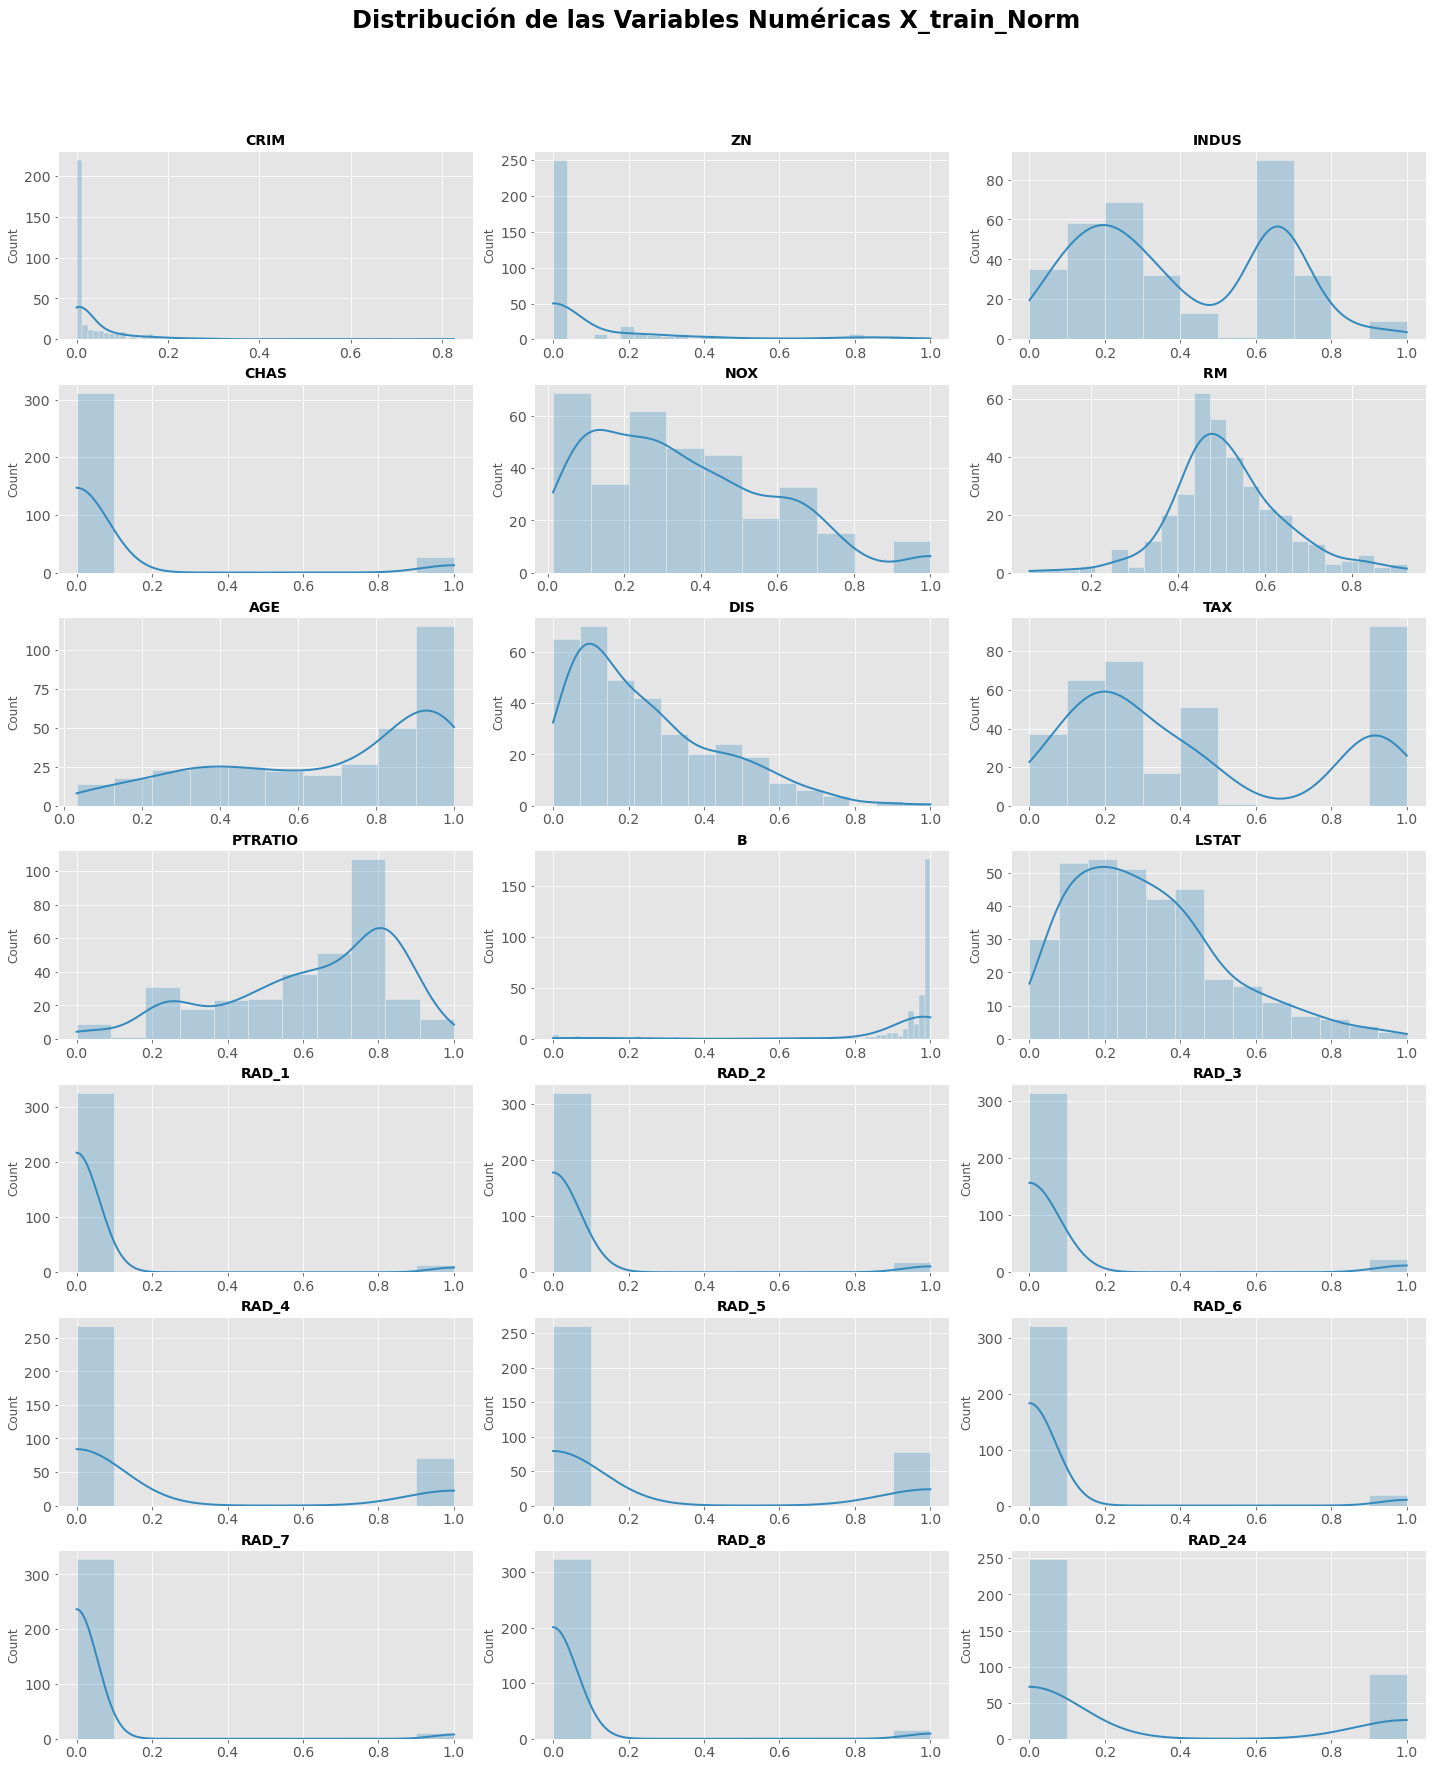

In [413]:
# Distribución gráfica de cada variable numérica estandarizada: X_train_Norm
# ==============================================================================

fig, axes = plt.subplots(ncols=3, nrows=7, figsize=(20, 25))
axes = axes.flat
columnas_numeric = X_train_Norm.select_dtypes(include=['float64', 'int','uint8']).columns

for i, colum in enumerate(columnas_numeric):     
    sns.histplot(data = X_train_Norm, x= colum, stat= "count", kde = True, line_kws= {'linewidth': 2}, alpha   = 0.3, ax = axes[i])
    axes[i].set_title(colum, fontsize = 14, fontweight = "bold")
    axes[i].tick_params(labelsize = 14)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución de las Variables Numéricas X_train_Norm', fontsize = 24, fontweight = "bold")
plt.savefig("Gafico4_Dist_Variables_Numericas.png")

##### La distribución de la muestra X_train_Norm facilita que las variables se distribuyan en el eje de las x en un rango de [0,1], por lo que se redimensionan las funciones de distribución de las variables de forma que resultan comparables en cuanto a su distribución de probabilidad.
##### Vemos que las funcicones de distribución mantienen la misma forma que las de los datos originales, pero se equilibra el peso de las desviaciones estándar en un rango inferior al original.

#### 2. Descripción estadística y gráfica de X_test_Norm

#### 2.a) Data frame X_test_Norm

In [414]:
X_test_Norm = pd.DataFrame(X_test_Norm)
X_test_Norm.columns =["CRIM","ZN","INDUS","CHAS","NOX","RM ","AGE","DIS","TAX","PTRATIO","B","LSTAT","RAD_1","RAD_2","RAD_3","RAD_4","RAD_5","RAD_6","RAD_7","RAD_8","RAD_24"] 

In [415]:
X_test_Norm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167 entries, 307 to 347
Data columns (total 21 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     167 non-null    float64
 1   ZN       167 non-null    float64
 2   INDUS    167 non-null    float64
 3   CHAS     167 non-null    float64
 4   NOX      167 non-null    float64
 5   RM       167 non-null    float64
 6   AGE      167 non-null    float64
 7   DIS      167 non-null    float64
 8   TAX      167 non-null    float64
 9   PTRATIO  167 non-null    float64
 10  B        167 non-null    float64
 11  LSTAT    167 non-null    float64
 12  RAD_1    167 non-null    uint8  
 13  RAD_2    167 non-null    uint8  
 14  RAD_3    167 non-null    uint8  
 15  RAD_4    167 non-null    uint8  
 16  RAD_5    167 non-null    uint8  
 17  RAD_6    167 non-null    uint8  
 18  RAD_7    167 non-null    uint8  
 19  RAD_8    167 non-null    uint8  
 20  RAD_24   167 non-null    uint8  
dtypes: float64(12)

##### 2.b) X_test_Norm.Describe

In [416]:
X_test_Norm.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CRIM,167.0,0.036427,0.095256,0.000052,0.000794,0.002870,0.035025,1.000000
ZN,167.0,0.121766,0.238983,0.000000,0.000000,0.000000,0.200000,0.950000
INDUS,167.0,0.373466,0.250244,0.028959,0.154509,0.296921,0.646628,1.000000
CHAS,167.0,0.047904,0.214206,0.000000,0.000000,0.000000,0.000000,1.000000
NOX,167.0,0.342723,0.229909,0.000000,0.150206,0.302469,0.491770,1.000000
RM,167.0,0.536317,0.145848,0.000000,0.463403,0.526729,0.588139,1.000000
AGE,167.0,0.663850,0.288305,0.000000,0.399588,0.725026,0.929454,1.000000
DIS,167.0,0.241549,0.190348,0.004410,0.088407,0.178478,0.379930,0.871218
TAX,167.0,0.419676,0.318217,0.001908,0.179389,0.286260,0.914122,1.000000
PTRATIO,167.0,0.630908,0.228234,0.042553,0.510638,0.691489,0.808511,1.000000


#### 2.c)  Distribución gráfica de cada variable numérica estandarizada: X_test_Norm

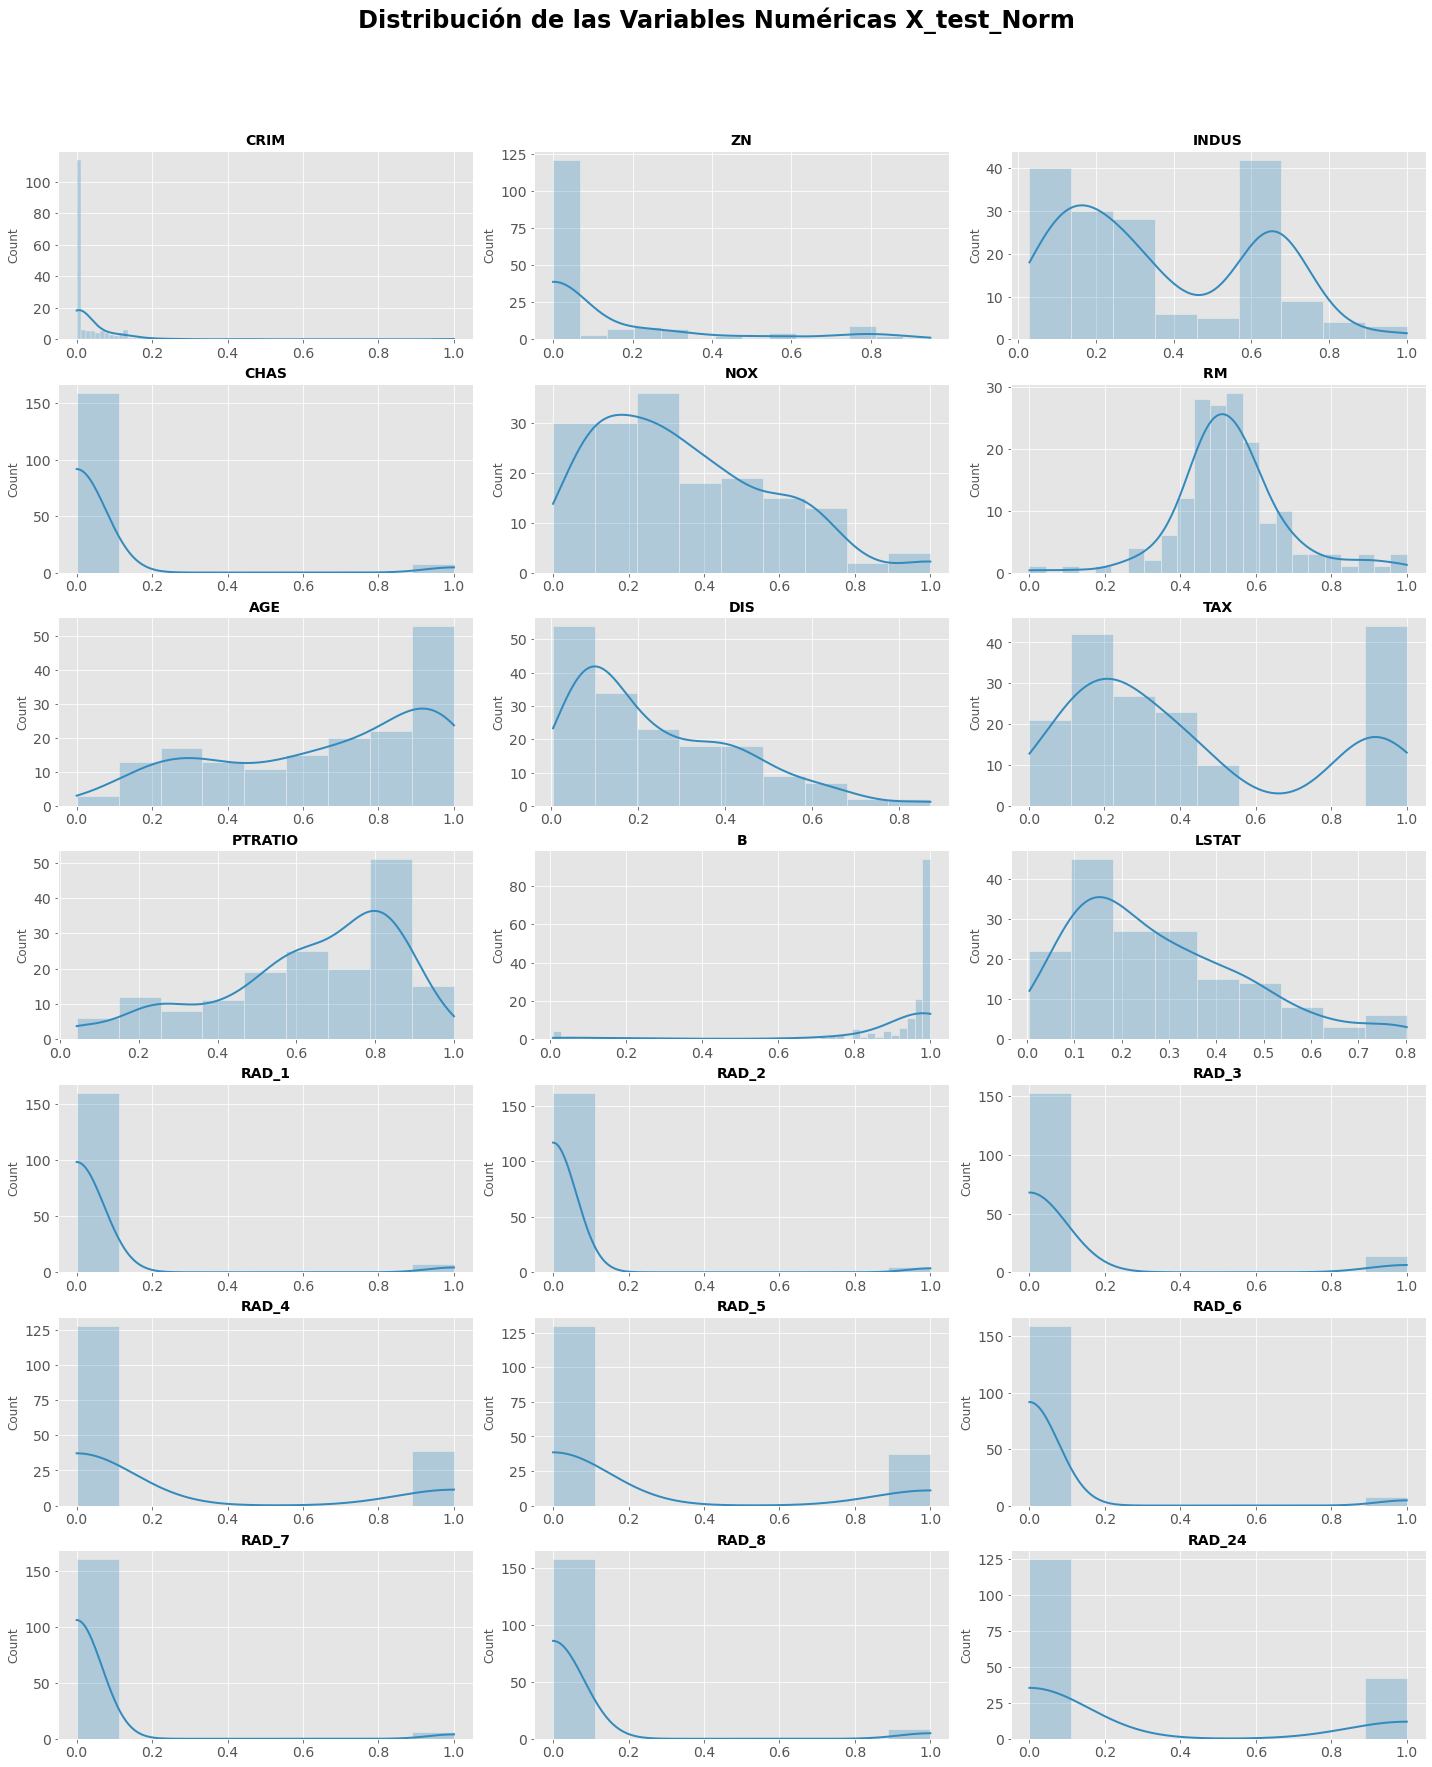

In [417]:
# Distribución gráfica de cada variable numérica estandarizada: X_test_Norm
# ==============================================================================

fig, axes = plt.subplots(ncols=3, nrows=7, figsize=(20, 25))
axes = axes.flat
columnas_numeric = X_test_Norm.select_dtypes(include=['float64', 'int','uint8']).columns

for i, colum in enumerate(columnas_numeric):
    sns.histplot(data = X_test_Norm, x= colum, stat= "count", kde = True, line_kws= {'linewidth': 2}, alpha   = 0.3, ax = axes[i])
    axes[i].set_title(colum, fontsize = 14, fontweight = "bold")
    axes[i].tick_params(labelsize = 14)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución de las Variables Numéricas X_test_Norm', fontsize = 24, fontweight = "bold")
plt.savefig("Gafico5_Dist_Variables_Numericas.png")

##### La distribución de la muestra X_test_Norm facilita también, que las variables se distribuyan en el eje de las x en un rango de [0,1], por lo que se redimensionan las funciones de distribución de las variables de forma que resultan comparables en cuanto a su distribución de probabilidad.
##### También vemos que las funcicones de distribución mantienen la misma forma que las de los datos originales, pero se equilibra el peso de las desviaciones estándar en un rango inferior al original.

#### 3. Resumen de las diferencias en medias y desviación estándar entre X_train_Norm y X_test_Norm 

#### 3.a) Diferencias % en las medias

In [418]:
# Data Summary
# Creacción de un diccionario con los resultados de las medias de los datos y train
outcomes7 = {'train_mean':X_train_Norm.mean(),'test_mean':X_test_Norm.mean()}

# Transformación del diccionario en un data frame
outcomes7 = pd.DataFrame(outcomes7, index=["CRIM","ZN","INDUS","CHAS","NOX","RM ","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT","RAD_1","RAD_2","RAD_3","RAD_4","RAD_6","RAD_7","RAD_8","RAD_24"])

# Se añade el valor correspondiente al error %
outcomes7['%_error7'] =round( (abs(outcomes7['train_mean'] - outcomes7['test_mean']))/outcomes7['train_mean'] *100,4)

# Salida de información en función del menor valor del error %.
outcomes7.sort_values(by='%_error7')

,train_mean,test_mean,%_error7
B,0.898261,0.899190,0.1033
DIS,0.242791,0.241549,0.5115
TAX,0.423456,0.419676,0.8926
PTRATIO,0.618998,0.630908,1.9241
NOX,0.352341,0.342723,2.7297
AGE,0.682528,0.663850,2.7365
RM,0.514752,0.536317,4.1893
RAD_24,0.265487,0.251497,5.2695
INDUS,0.400201,0.373466,6.6806
RAD_1,0.038348,0.041916,9.3045


#### 3.b) Diferencias % en las desviaciones estándar

In [419]:
# Data Summary
# Creacción de un diccionario con los resultados de las medias de los datos y train
outcomes8 = {'train_dEst':X_train_Norm.std(),'test_dEst':X_test_Norm.std()}

# Transformación del diccionario en un data frame
outcomes8 = pd.DataFrame(outcomes8, index=["CRIM","ZN","INDUS","CHAS","NOX","RM ","AGE","DIS","TAX","PTRATIO","B","LSTAT","RAD_1","RAD_2","RAD_3","RAD_4","RAD_5","RAD_6","RAD_7","RAD_8","RAD_24"])

# Se añade el valor correspondiente al error %
outcomes8['%_error8'] =round( (abs(outcomes8['train_dEst'] - outcomes8['test_dEst']))/outcomes8['train_dEst'] *100,4)

# Salida de información en función del menor valor del error %.
#outcomes8.sort_values(by='%_error8')
outcomes8

,train_dEst,test_dEst,%_error8
CRIM,0.097448,0.095256,2.2495
ZN,0.230587,0.238983,3.6408
INDUS,0.251985,0.250244,0.6910
CHAS,0.271145,0.214206,20.9994
NOX,0.242791,0.229909,5.3060
RM,0.128368,0.145848,13.6169
AGE,0.290903,0.288305,0.8931
DIS,0.192318,0.190348,1.0240
TAX,0.323767,0.318217,1.7144
PTRATIO,0.231565,0.228234,1.4387


#### 3.c) Gráfico de diferencias de errores en la media y desviación estándar entre: X_train - X_test Normalizadas

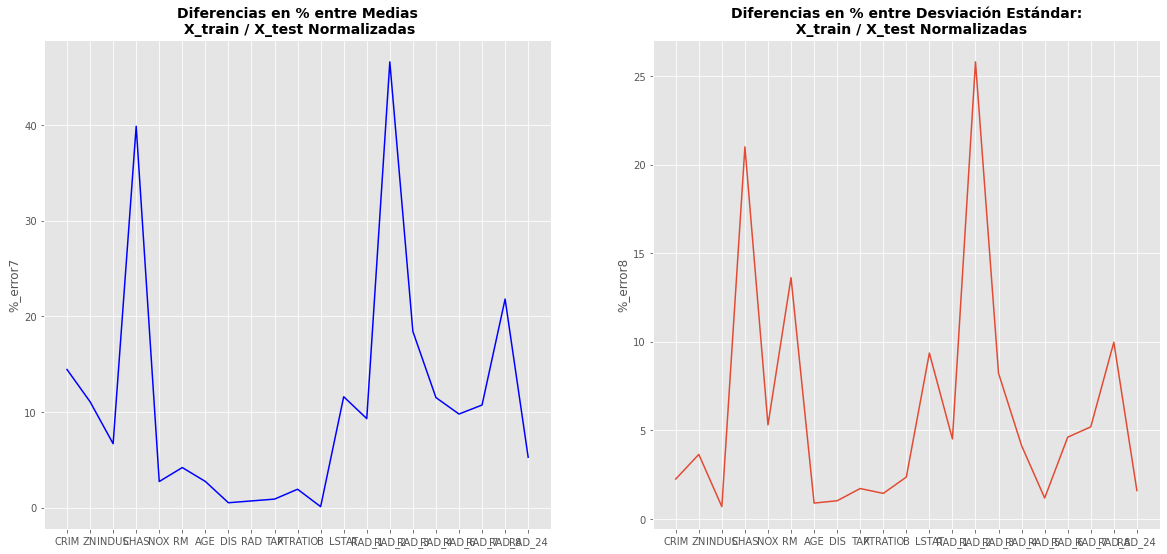

In [420]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(20, 9))
axes = axes.flat
axes[0].set_title("Diferencias en % entre Medias\n X_train / X_test Normalizadas", fontsize = 14, fontweight = "bold")
sns.lineplot(data=outcomes7["%_error7"],color="blue", ax=axes[0])
axes[1].set_title("Diferencias en % entre Desviación Estándar:\n  X_train / X_test Normalizadas", fontsize = 14, fontweight = "bold")
sns.lineplot(data=outcomes8["%_error8"],ax=axes[1])
plt.savefig("Gafico5_Diferencias_medias_std.png")

##### El rango de las diferencias entre medias y desviaciones estándar es similar a las que se producian al separar los datos originales entre train y test, por tanto en este caso, no mejora la selección de las muestrar aplicar un proceso de estándarización de las variables numéricas.